#📌 Extracão

In [1]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

response = requests.get(url)
response.raise_for_status()

data = response.json()

df = pd.DataFrame(data)

print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformação

In [3]:
print(df.info())

print(df.describe())

# Extract values from dictionary columns
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenate the new dataframes with the original dataframe
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                customer_df, phone_df, internet_df, account_df], axis=1)

# Now check unique values in all columns
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique         

In [8]:
import requests
import pandas as pd

dict_url = (
    "https://raw.githubusercontent.com/"
    "ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"
)

response = requests.get(dict_url)
response.raise_for_status()
content = response.text

print(content[:500])

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLin


In [18]:
print(df.isnull().sum())

print((df.isnull().sum() / len(df)) * 100)


customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
customerID          0.000000
Churn               0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBi

In [17]:
print("Duplicados:", df.duplicated().sum())

df = df.drop_duplicates()


Duplicados: 0


In [16]:
print(df.dtypes)

df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")

print(df.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Stream

In [13]:
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [15]:
print(df["Churn"].value_counts(normalize=True))

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


In [27]:
print(df.isnull().sum())

df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")

df["Charges.Total"] = df["Charges.Total"].fillna(0)

print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [26]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

In [24]:
replace_map = {
    "No internet service": "No",
    "No phone service": "No"
}

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].replace(replace_map)


In [25]:
print(df.info())
print(df.isnull().sum())
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [30]:
df["Contas_Diarias"] = df["Charges.Monthly"] / 30

print(df[["Charges.Monthly", "Contas_Diarias"]].head())

   Charges.Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667


#📊 Carga e análise

In [31]:
desc = df.describe().T

desc["median"] = df.median(numeric_only=True)

print(desc)

                  count         mean          std        min         25%  \
SeniorCitizen    7267.0     0.162653     0.369074   0.000000    0.000000   
tenure           7267.0    32.346498    24.571773   0.000000    9.000000   
Charges.Monthly  7267.0    64.720098    30.129572  18.250000   35.425000   
Charges.Total    7267.0  2277.182035  2268.648587   0.000000  396.200000   
Contas_Diarias   7267.0     2.157337     1.004319   0.608333    1.180833   

                         50%          75%          max       median  
SeniorCitizen       0.000000     0.000000     1.000000     0.000000  
tenure             29.000000    55.000000    72.000000    29.000000  
Charges.Monthly    70.300000    89.875000   118.750000    70.300000  
Charges.Total    1389.200000  3778.525000  8684.800000  1389.200000  
Contas_Diarias      2.343333     2.995833     3.958333     2.343333  


In [33]:
for col in ["Charges.Monthly", "Charges.Total", "Contas_Diarias", "tenure"]:
    print(f"\n📊 {col}:")
    print(f" Média: {df[col].mean():.2f}")
    print(f" Mediana: {df[col].median():.2f}")
    print(f" Desvio padrão: {df[col].std():.2f}")
    print(f" Valor mínimo: {df[col].min():.2f}")
    print(f" Valor máximo: {df[col].max():.2f}")


📊 Charges.Monthly:
 Média: 64.72
 Mediana: 70.30
 Desvio padrão: 30.13
 Valor mínimo: 18.25
 Valor máximo: 118.75

📊 Charges.Total:
 Média: 2277.18
 Mediana: 1389.20
 Desvio padrão: 2268.65
 Valor mínimo: 0.00
 Valor máximo: 8684.80

📊 Contas_Diarias:
 Média: 2.16
 Mediana: 2.34
 Desvio padrão: 1.00
 Valor mínimo: 0.61
 Valor máximo: 3.96

📊 tenure:
 Média: 32.35
 Mediana: 29.00
 Desvio padrão: 24.57
 Valor mínimo: 0.00
 Valor máximo: 72.00


In [34]:
for col in ["gender", "Contract", "InternetService", "Churn"]:
    print(f"\n📌 {col}:")
    print(df[col].value_counts(normalize=True) * 100)



📌 gender:
gender
Male      50.571075
Female    49.428925
Name: proportion, dtype: float64

📌 Contract:
Contract
Month-to-month    55.112151
Two year          23.985138
One year          20.902711
Name: proportion, dtype: float64

📌 InternetService:
InternetService
Fiber optic    44.007156
DSL            34.236962
No             21.755883
Name: proportion, dtype: float64

📌 Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


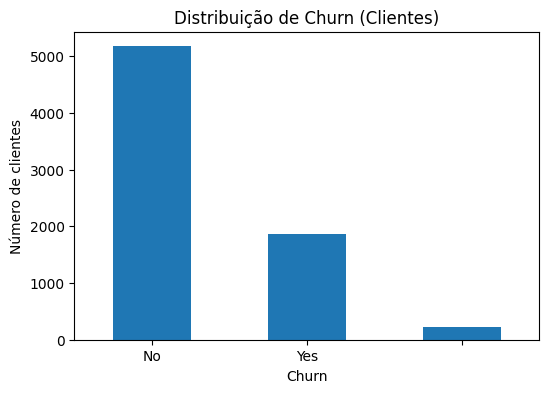

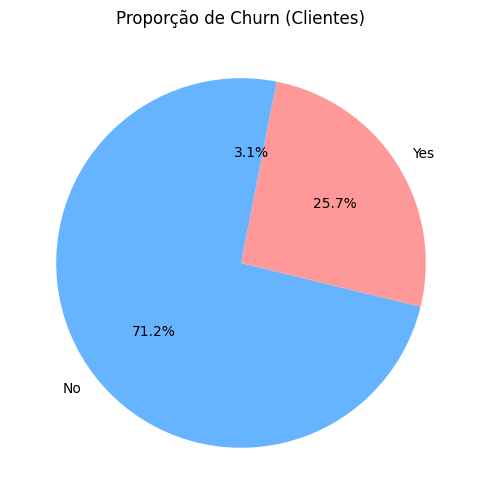

In [35]:
import matplotlib.pyplot as plt

# Contagem de churn
churn_counts = df["Churn"].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
churn_counts.plot(kind="bar", rot=0)
plt.title("Distribuição de Churn (Clientes)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()

# Gráfico de pizza
plt.figure(figsize=(6,6))
churn_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["#66b3ff","#ff9999"])
plt.ylabel("")
plt.title("Proporção de Churn (Clientes)")
plt.show()


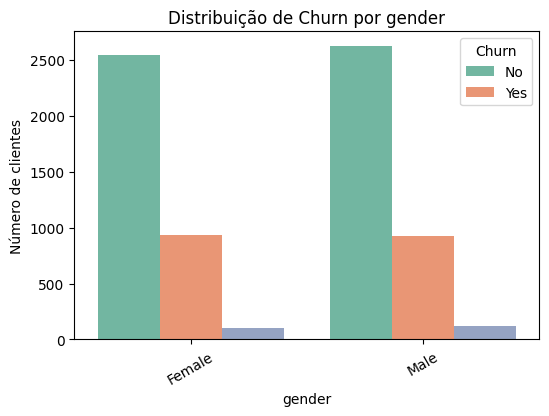

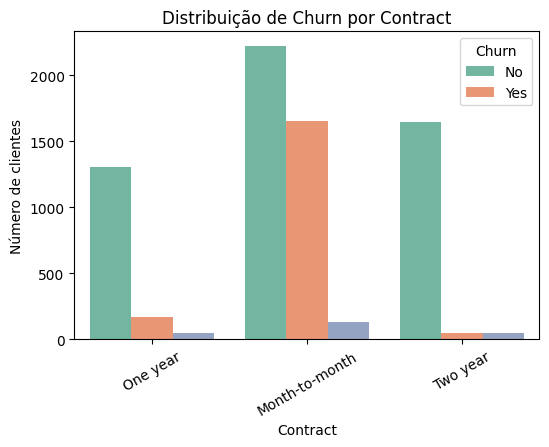

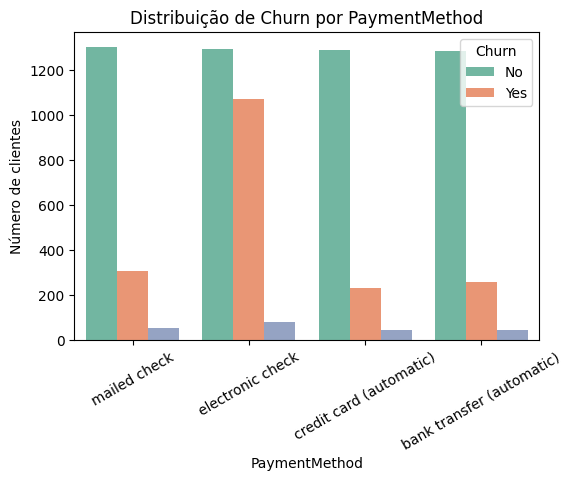

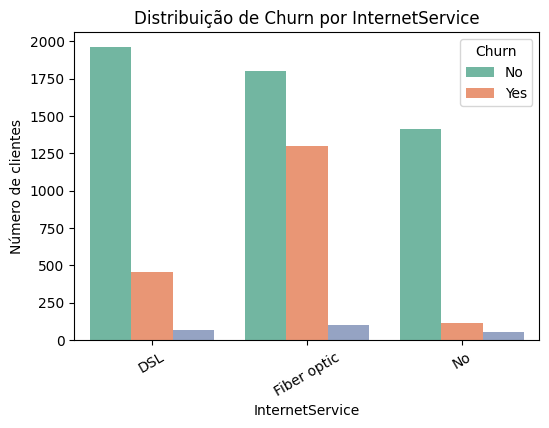

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis categóricas relevantes
categorical_cols = ["gender", "Contract", "PaymentMethod", "InternetService"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2")
    plt.title(f"Distribuição de Churn por {col}")
    plt.xticks(rotation=30)
    plt.ylabel("Número de clientes")
    plt.xlabel(col)
    plt.legend(title="Churn")
    plt.show()


/tmp/ipython-input-1333856419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set2")


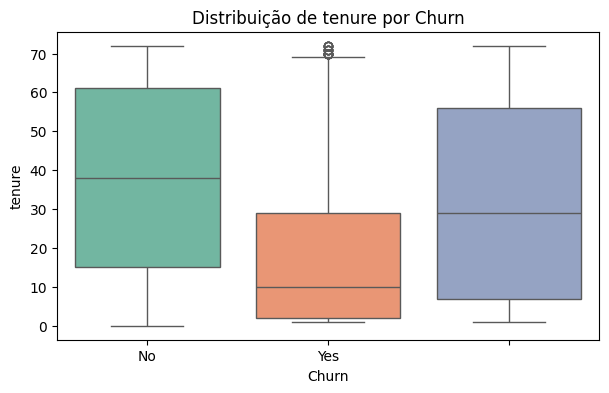

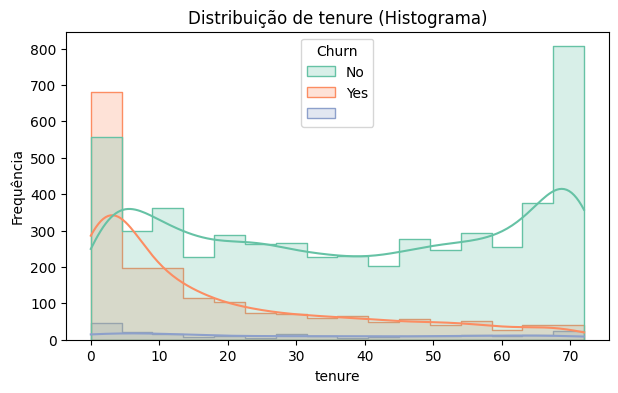

/tmp/ipython-input-1333856419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set2")


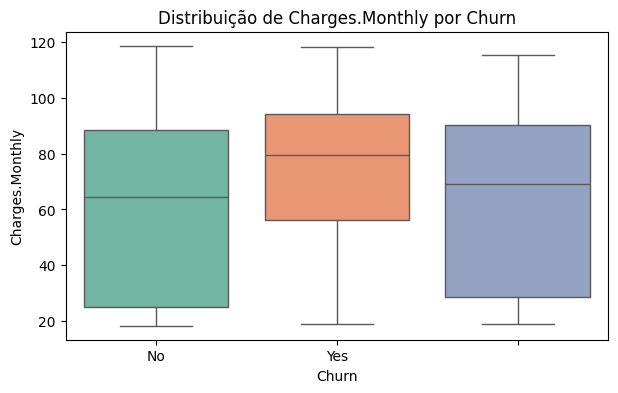

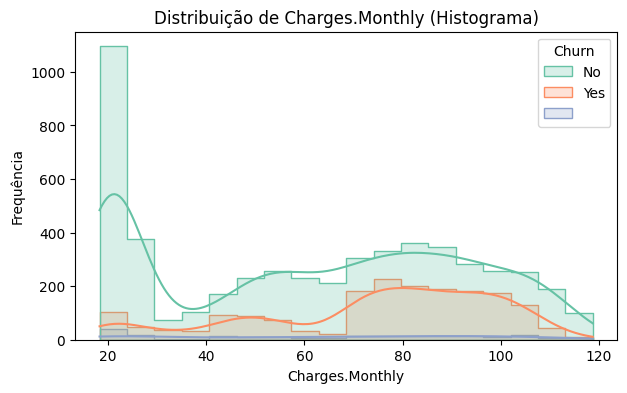

/tmp/ipython-input-1333856419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set2")


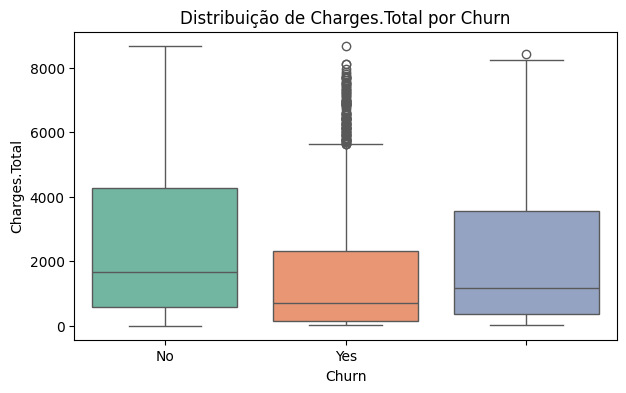

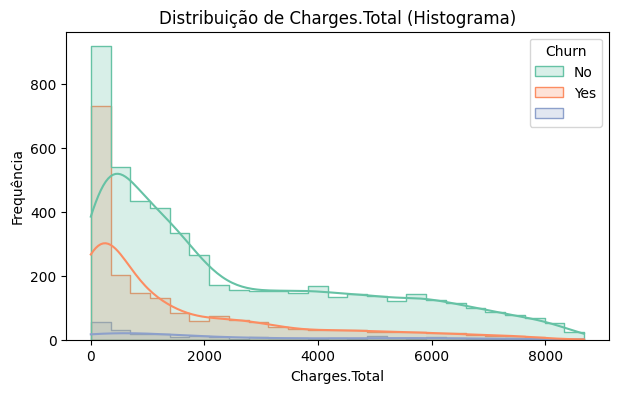

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis numéricas relevantes
numeric_cols = ["tenure", "Charges.Monthly", "Charges.Total"]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="Churn", y=col, palette="Set2")
    plt.title(f"Distribuição de {col} por Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, element="step", palette="Set2")
    plt.title(f"Distribuição de {col} (Histograma)")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

#📄Relatorio Final

# Relatório de Análise – TelecomX
**Introdução**

O objetivo desta análise é entender por que alguns clientes da TelecomX cancelam o serviço (churn). Saber quem sai ajuda a empresa a tomar decisões para reter clientes e melhorar os serviços.

**Limpeza e Tratamento de Dados**

Carreguei os dados do JSON e converti para um DataFrame do pandas.

Removi duplicados e valores faltantes.

Transformei algumas colunas em números (TotalCharges, MonthlyCharges, tenure).

Criei a coluna Contas_Diarias dividindo o gasto mensal por 30.

Padronizei categorias, como transformar "No internet service" em "No".

### **Análise Exploratória**

**Churn**

A maioria dos clientes não cancelou, mas existe uma parte que sim.

Gráficos de barra e pizza ajudam a visualizar isso.

**Variáveis categóricas**

Contrato mensal tem mais cancelamentos que anual ou trimestral.

Clientes que pagam por boleto cancelam mais do que quem usa débito automático.

Tipo de internet também influencia: fibra óptica apresentou mais cancelamentos.

**Variáveis numéricas**

Clientes com menos tempo de contrato têm mais chance de sair.

Clientes que gastam mais por mês podem cancelar mais.

Quem já gastou muito no total tende a permanecer.

Contas_Diarias mostra padrões parecidos com MonthlyCharges.

**Conclusões e Insights**

Churn acontece mais nos primeiros meses e em contratos mensais.

Gastos altos podem ser um risco, mas clientes com histórico de gasto acumulado tendem a ficar.

Meio de pagamento e tipo de serviço mostram diferenças importantes.

**Recomendações**

Criar programas para novos clientes nos primeiros meses.

Incentivar contratos mais longos.

Oferecer benefícios para débito automático.

Melhorar qualidade do serviço onde o churn é maior.

Usar esses dados para modelos que preveem churn no futuro.